

# Applying CRISP-DM Process on "No-Show" Medical Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#crisp">CRISP-DM Process</a></li>
<li><a href="#step1">Step 1: Business Understanding</a></li>
<li><a href="#step2">Step 2: Data Understanding</a></li>
<li><a href="#step3">Step 3: Prepare Data</a></li>
<li><a href="#step4">Step 4: Data Modeling</a></li>
<li><a href="#step5">Step 5: Evaluation</a></li>
<li><a href="#step6">Step 6: Deployment</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is my implementation of the **"CRISP-DM Process"** to create a blog and a Github post to show off my skills in  the Data Analysis.

#### CRISP-DM Process:
- **Step 1: Business Understanding**
- **Step 2: Data Understanding**
- **Step 3: Prepare Data**
- **Step 4: Data Modeling**
- **Step 5: Evaluation**
- **Step 6: Deployment**


#### About the Data 
The dataset that is under investigation,"No-Show" Appointments Dataset,is a set of information collected from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments. Several characteristics about a patient are included in each row such as Gender, Age, Neighbourhood as well as the patient's primary health designation(s) including Hypertension, Diabetes, Alcoholism, and whether the patient is handicapped or not. A period of six months of appointments' data has been investigated below. 

<a id='crisp'></a>
## CRISP-DM Process: 

<a id='step1'></a>
## Step 1: Business Understanding 
**The following are the Questions we are interested in tackling and trying to answer:**
- Are there specific days of the week where no-show appointments occurrences increase?  
- Does the Number of  Awaiting Days,between Scheduled Date and Appointment Date, affect the probability of a patient to miss his/her appointment? Do patients with a greater Number of  Awaiting Days tend to miss their appointments more than those with fewer Awaiting Days?   What is the correlation between the Number of  Awaiting Days and the probability of a patient's Not-Showing up for the appointment?
- Do patients receiving SMS reminders have more probability to show up for their appointments than those who have not received the SMS reminders?

<a id='step2'></a>
## Step 2: Data Understanding
### During this step we will be performing the First two steps of the data science process :
- **Gather** 
- **Assess**

In [1]:
# importing the neccessary packages and libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

%matplotlib inline

In [2]:
#loading Data
df=pd.read_csv('no-show-appointments.csv')

In [3]:
# displaying the first five rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# checking the number of rows and columns of the dataset
df.shape

(110527, 14)

In [5]:
#checking the columns' labels
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
# checking the data types of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
# checking which columns have missing values 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# checking the total number of duplicated rows 
df.duplicated().sum()

0

In [9]:
# checking for erroneous values
print('Age:',sorted(df.Age.unique())) # sort the ages to make it easier for outlier checking
print('Gender:',df.Gender.unique())
print('Hipertension:',df.Hipertension.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Handcap:',df.Handcap.unique())
print('SMS_received:',df.SMS_received.unique())
print('No-show:',df['No-show'].unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Hipertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handcap: [0 1 2 3 4]
SMS_received: [0 1]
No-show: ['No' 'Yes']


### Exploratory Visuals 

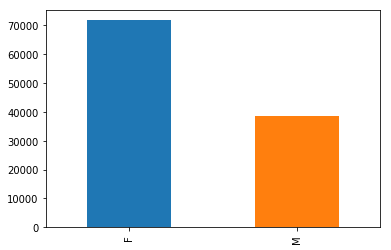

In [10]:
# plotting the gender of the patients 
df['Gender'].value_counts().plot(kind='bar');

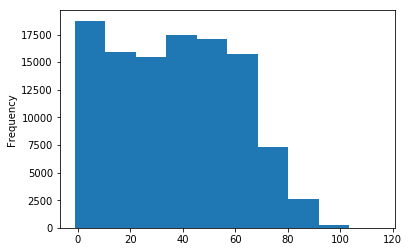

In [11]:
# plotting the petients' Age Distribution
df['Age'].plot(kind='hist');

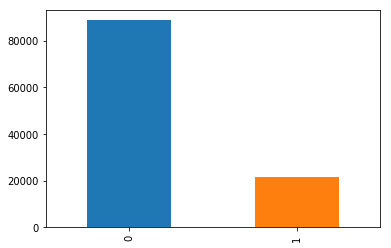

In [12]:
# plotting the gender of the patients 
df['Hipertension'].value_counts().plot(kind='bar');

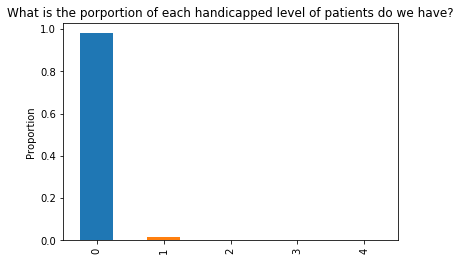

In [13]:
# getting the proportions of different levels of handicapped patients
(df['Handcap'].value_counts()/df.shape[0]).plot(kind="bar");
plt.title("What is the porportion of each handicapped level of patients do we have?");
plt.ylabel("Proportion");

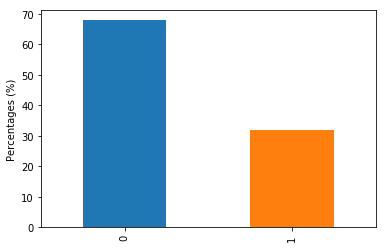

In [14]:
# getting the percentages of patients who recieved SMS and who did not
((df['SMS_received'].value_counts()/df.shape[0])*100).plot(kind="bar");
plt.ylabel("Percentages (%)");

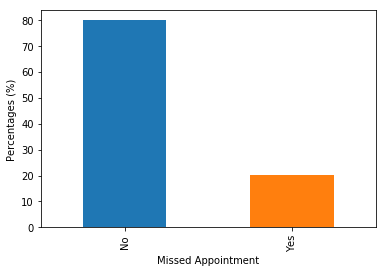

In [15]:
# getting percentages of patients who attended their appointments and those who missed them
((df['No-show'].value_counts()/df.shape[0])*100).plot(kind="bar");
plt.ylabel("Percentages (%)");
plt.xlabel("Missed Appointment");

<a id='step3'></a>
## Step 3: Prepare Data

### During this step we will be performing the Third step of the data science process :
- **clean**

### 1)   Fix the Columns'  Labels

##### 1. Lower Case all the Columns' Labels

In [16]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

##### 2. Replacing any dash(-) with underscore( _ ) to facilitate working on the dataset

In [17]:
df.rename(columns=lambda x: x.replace("-", "_"), inplace=True)

##### 3. Adding " _ " if the column's Label Originally Consists of Two Words and Correcting Typoes (spelling mistakes)

In [18]:
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 
                   'appointmentday':'appointment_day', 'hipertension':'hypertension', 'handcap':'handicap',
                   'sms_received':'SMS_received'}, inplace = True)

##### 4. Renaming the 'no_show' column to be  'appointment_missed' , since the current label is confusing

In [19]:
df.rename(columns={'no_show':'appointment_missed'}, inplace = True)

In [20]:
# printing the columns' labels to confirm that the changes have been correctly applied
for i, v in enumerate(df.columns):
    print(i, v)

0 patient_id
1 appointment_id
2 gender
3 scheduled_day
4 appointment_day
5 age
6 neighbourhood
7 scholarship
8 hypertension
9 diabetes
10 alcoholism
11 handicap
12 SMS_received
13 appointment_missed


### 2) Fix the Columns'  Data Types

##### 1. Changing the data type of 'patient_id' column to 'int64' instead of being 'float64'

In [21]:
df.patient_id = df['patient_id'].astype(np.int64)

##### 2. Changing the data types of 'scheduled_day' and 'appointment_day'  from 'object' to 'Datetime' to facilitate working on them later on

In [22]:
df.scheduled_day   = df.scheduled_day.apply(np.datetime64)
df.appointment_day = df.appointment_day.apply(np.datetime64)

In [23]:
# confirming Datatype Changes
df.dtypes

patient_id                     int64
appointment_id                 int64
gender                        object
scheduled_day         datetime64[ns]
appointment_day       datetime64[ns]
age                            int64
neighbourhood                 object
scholarship                    int64
hypertension                   int64
diabetes                       int64
alcoholism                     int64
handicap                       int64
SMS_received                   int64
appointment_missed            object
dtype: object

### 3) Enhancing the Values of some Columns

##### 1. Stripping Time from 'scheduled_day' and 'appointment_day' Columns, so that we are only left with the Date 

In [24]:
df['scheduled_day'] = df['scheduled_day'].dt.date
df['appointment_day'] = df['appointment_day'].dt.date

In [25]:
# confirming changes
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,appointment_missed
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### 2. Removing the rows with  'age'  outliers : 0 and 115

In [26]:
df = df[(df['age']  > 0) & (df['age'] <= 102)]

In [27]:
# confirming changes have been successfully applied
print(sorted(df.age.unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102]


**3. Changing the values of 'appointment_missed' column to 0's and 1's** 
> where 0 = Showed up to appointment('No'), and 1 = did not show up (missed the appointment) ('Yes')

In [28]:
df['appointment_missed'].replace({'Yes':1 , 'No':0}, inplace=True)

In [29]:
# confirming changes
df.appointment_missed.unique()

array([0, 1], dtype=int64)

### 4) Dropping an Unrelated Column and Adding some New Columns

##### 1. Drop 'scolarship' Column

In [30]:
df.drop('scholarship', axis=1, inplace=True)

In [31]:
# confirming changes
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'SMS_received', 'appointment_missed'],
      dtype='object')

##### 2. Add a new column 'day_of_week'

>Adding this new column will be helpful when answering one of the previously posted Questions. 

In [32]:
df['day_of_week'] = pd.to_datetime(df['appointment_day']).apply(lambda x: x.isoweekday())

In [33]:
# checking the unique values in our new column 
print(sorted(df['day_of_week'].unique()))

[1, 2, 3, 4, 5, 6]


In [34]:
# replacing the day number by the day name in our newly created 'day_of_week' column
df['day_of_week']=df['day_of_week'].replace({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

In [35]:
# checking the new column's unique values
df['day_of_week'].unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

##### 3. Calculating and Adding a New Column to Show Patient's Awaiting Days

> **awaiting_days:** is the rounded number of Days from the Scheduled Day to the Appointment Day

Patient's Awaiting Days is calculated by finding the difference between the appointment day and the scheduled day.

In [36]:
df['awaiting_days'] = (df['appointment_day'] - df['scheduled_day']).dt.days

In [37]:
# confirming changes 
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'SMS_received', 'appointment_missed',
       'day_of_week', 'awaiting_days'],
      dtype='object')

### 5) Handling Categorical Variables

In [38]:
# creating a list of all the categorical variables in the dataset
columns = df.columns
categorical_var = [] 

for col in columns:
    if df[col].dtype=='object':
        categorical_var.append(col)

In [39]:
# checking the columns' labels of the categorical variables
categorical_var

['gender', 'scheduled_day', 'appointment_day', 'neighbourhood', 'day_of_week']

In [40]:
# printingthe number of the unique values in each categorical variable
for col in categorical_var:
    num_unique = len(df[col].unique())
    print('- The number of unique values in "{}" is {} values.'.format(col ,num_unique))

- The number of unique values in "gender" is 2 values.
- The number of unique values in "scheduled_day" is 110 values.
- The number of unique values in "appointment_day" is 27 values.
- The number of unique values in "neighbourhood" is 81 values.
- The number of unique values in "day_of_week" is 6 values.


### Returning back to the Questions posted within the 'Business Understanding Step' , checking the number of unique values in each categorical variable , I decided to :
- **ONLY One-Hot Encode the 'gender' and 'day_of_week' categorical variables** since they have a few number of unique values and are directly related to the Qs of interest.
- **Ignore other categorical variables ,i.e.'scheduled_day' , 'appointment_day' and 'neighbourhood' variables** b/c encoding them requires the creation of a large number of new columns and they are not needed to answer the Qs posted within the  'Business Understanding Step'

#### One Hot Encode  'gender' and 'day_of_week' categorical variables

In [41]:
# One Hot Encode 'gender' categorical variables
df= pd.get_dummies(df, columns=['gender'], drop_first = True)

# One Hot Encode 'day_of_week' categorical variables
df= pd.get_dummies(df, columns=['day_of_week'])

In [42]:
# checking the datatypes of the dataset columns , 
# we should only get three categorical columns( the ones that I decided not to Encode them within the last step)
df.dtypes

patient_id                int64
appointment_id            int64
scheduled_day            object
appointment_day          object
age                       int64
neighbourhood            object
hypertension              int64
diabetes                  int64
alcoholism                int64
handicap                  int64
SMS_received              int64
appointment_missed        int64
awaiting_days             int64
gender_M                  uint8
day_of_week_Friday        uint8
day_of_week_Monday        uint8
day_of_week_Saturday      uint8
day_of_week_Thursday      uint8
day_of_week_Tuesday       uint8
day_of_week_Wednesday     uint8
dtype: object

In [43]:
# renaming the newely created dummy variable of 'gender_M' to be 'gender', 
df.rename(columns = {'gender_M' : 'male'} , inplace = True)

In [44]:
# if 'gender_M' has been successfully renamed to 'male', the following line of code should return True
'male' in df.columns

True

### The 'male' column has two unique values : 1 and 0 , 
> where 1 means that the patient's gender is male , and 0 means that the patient's gender is female

### 6) Handling Missing Values

#### During the 'Data Understanding Step', it appeared that the dataset has NO Missing values. However, as a final check, I would run the following line of code that drops all the rows  with any missing values in any of its columns. 
> If the resulting dataset has the same number of rows as our original dataset then this confirms that we don't have any absence of missing values in our dataset.

In [45]:
# drop the row if any NA values are present, and store the resulting dataframe as 'df_dropna'
df_dropna = df.dropna(axis = 0)

In [46]:
# comparing the number of rows in the two dataframe ( the original one and the newely created one)
# if our original dataset has Misssing values, the output of the following line of code should be "True"
df_dropna.shape[0] == df.shape[0]

True

### 7) Splitting the Data into two Data Frames 
#### This can be easily done by creating two data frames to separate patients who attended their appointments(showed up) from those who missed their appointments (did not show up).

In [47]:
df_no_show = df[df['appointment_missed'] == 1]
df_show = df[df['appointment_missed'] == 0]

**Checking the newely created Data Frames**

In [48]:
df_no_show.head(3)

,patient_id,appointment_id,scheduled_day,appointment_day,age,neighbourhood,hypertension,diabetes,alcoholism,handicap,SMS_received,appointment_missed,awaiting_days,male,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
6,733688164476661,5630279,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,1,2,0,1,0,0,0,0,0
7,3449833394123,5630575,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,1,2,0,1,0,0,0,0,0
11,7542951368435,5620163,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,1,1,3,1,1,0,0,0,0,0


In [49]:
df_show.head(3)

,patient_id,appointment_id,scheduled_day,appointment_day,age,neighbourhood,hypertension,diabetes,alcoholism,handicap,SMS_received,appointment_missed,awaiting_days,male,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,29872499824296,5642903,2016-04-29,2016-04-29,62,JARDIM DA PENHA,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,558997776694438,5642503,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,4262962299951,5642549,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<a id='step4'></a>
## Step 4: Data Modeling
### During this step we could perform the Tifth step of the data science process :
- **model**

In [50]:
## Not necessary to answer the Questions posted within the Business Understanding Step(Step1)

<a id='step5'></a>
## Step 5: Evaluation
### During this step we will be performing the the following two steps of the data science process :
- **analyze**
- **visualize**

### Now , it is the time to answer our Questions of interest, evaluate the results and come up with great insights: 

### 1) Are there specific days of the week where the percentages of no-show appointments occurrences increase?  

#### Calculating the total and average numbers of missed appointments (No Show-Ups) per Day of Week 

In [51]:
# creating a dataframe to hold the day of the week and the number of no-shows on that specific day
cols = ['day_of_week_Monday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday','day_of_week_Friday','day_of_week_Saturday']
count_no = []

# creating a list of total number appointments missed (no_shows) for each column included in the cols list 
for col in cols:
    count_no.append(df_no_show[col].sum())

In [52]:
# defining a list of days 
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# creating an empty dictionary to hold both the week day and the total number of missed appointments of that day
days_count_no = {}
  
# adding list as value of our dictionary
days_count_no["Day"] = days
days_count_no["Count"] = count_no

days_count_no

{'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
 'Count': [4514, 5024, 4948, 3242, 3940, 9]}

In [53]:
# calculating the average number of missed appointments
mean_count = round(sum(count_no)/len(count_no),2) 
mean_count

3612.83

#### Plotting the total number of missed appointments (No Show-Ups) per Day of Week 

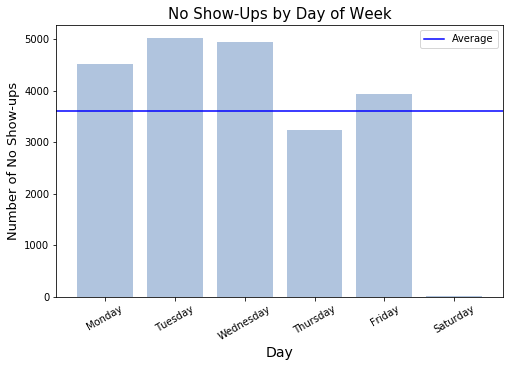

In [54]:
f, ax = plt.subplots(figsize=(8,5))
plt.bar(days_count_no['Day'], days_count_no['Count'], color='lightsteelblue')
plt.xlabel('Day',fontsize=14)
plt.ylabel('Number of No Show-ups',fontsize=13)
plt.xticks(days_count_no['Day'], rotation=30)
plt.axhline(mean_count, color="blue", label = 'Average')
ax.legend()
plt.title('No Show-Ups by Day of Week',fontsize=15)
plt.show()

#### Calculating the percentages of missed appointments (No Show-Ups) per Day of Week 

In [55]:
# creating a dataframe to hold the day of the week and the total number of 
# appointments(both attended and missed) on that specific day
cols = ['day_of_week_Monday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'day_of_week_Thursday',
        'day_of_week_Friday', 'day_of_week_Saturday']
count_appoint = []

# creating a list of total number appointments missed (no_shows) for each column included in the cols list 
for col in cols:
    count_appoint.append(df[col].sum())

In [56]:
# adding a new list( holding the total number of appointments in each day) to our dictionary
days_count_no["Total Appointments"] = count_appoint

days_count_no

{'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
 'Count': [4514, 5024, 4948, 3242, 3940, 9],
 'Total Appointments': [21901, 24831, 25090, 16657, 18464, 39]}

In [57]:
# finding the percentages of missed appointments (No Show-Ups) per Day of Week and adding the percentages to 
# its own list
percent = [] 
i = 0 

while i < 6:
    perc = round((days_count_no["Count"][i]/days_count_no["Total Appointments"][i])*100,2)
    percent.append(perc)
    i += 1

In [58]:
# adding a new list( holding the percentage of missed appointments in each day) to our dictionary
days_count_no["% of No-Shows"] = percent

days_count_no

{'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
 'Count': [4514, 5024, 4948, 3242, 3940, 9],
 'Total Appointments': [21901, 24831, 25090, 16657, 18464, 39],
 '% of No-Shows': [20.61, 20.23, 19.72, 19.46, 21.34, 23.08]}

In [59]:
# calculating the average percentage of missed appointments
mean_perc = round(sum(percent)/len(percent),2) 
mean_perc

20.74

#### Plotting the percentages of missed appointments (No Show-Ups) per Day of Week 

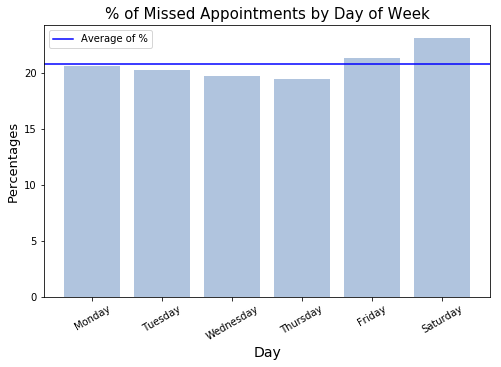

In [60]:
f, ax = plt.subplots(figsize=(8,5))
plt.bar(days_count_no['Day'], days_count_no['% of No-Shows'], color='lightsteelblue')
plt.xlabel('Day',fontsize=14)
plt.ylabel('Percentages',fontsize=13)
plt.xticks(days_count_no['Day'], rotation=30) 
plt.axhline(mean_perc, color="blue", label = 'Average of %')
ax.legend()
plt.title('% of Missed Appointments by Day of Week',fontsize=15)
plt.show()

#### Calculating  the total number of No Show-ups by Gender  by Day of Week 

In [61]:
df_no_show.columns

Index(['patient_id', 'appointment_id', 'scheduled_day', 'appointment_day',
       'age', 'neighbourhood', 'hypertension', 'diabetes', 'alcoholism',
       'handicap', 'SMS_received', 'appointment_missed', 'awaiting_days',
       'male', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object')

In [62]:
df_no_day_gender = df_no_show.groupby(['day_of_week_Saturday','day_of_week_Friday','day_of_week_Thursday',
                                       'day_of_week_Wednesday','day_of_week_Tuesday','day_of_week_Monday',
                                       'male'])['appointment_missed'].count().reset_index(name="count")

In [63]:
df_no_day_gender

,day_of_week_Saturday,day_of_week_Friday,day_of_week_Thursday,day_of_week_Wednesday,day_of_week_Tuesday,day_of_week_Monday,male,count
0,0,0,0,0,0,1,0,3011
1,0,0,0,0,0,1,1,1503
2,0,0,0,0,1,0,0,3358
3,0,0,0,0,1,0,1,1666
4,0,0,0,1,0,0,0,3229
5,0,0,0,1,0,0,1,1719
6,0,0,1,0,0,0,0,2103
7,0,0,1,0,0,0,1,1139
8,0,1,0,0,0,0,0,2564
9,0,1,0,0,0,0,1,1376


In [64]:
# creating a list to hold the total number of No Show-ups  for female patients per day of week
count_female = []
i = 0 

while i < df_no_day_gender.shape[0]:
    count_female.append(df_no_day_gender['count'][i])
    i +=2

In [65]:
# creating a list to hold the total number of No Show-ups  for male patients per day of week
count_male = []
i = 1

while i < df_no_day_gender.shape[0]:
    count_male.append(df_no_day_gender['count'][i])
    i +=2

#### Calculating  the percentages of No Show-ups by Gender  by Day of Week 

- Getting the total number of appointments  by gender per day of week

In [66]:
df_day_gender = df.groupby(['day_of_week_Saturday','day_of_week_Friday','day_of_week_Thursday','day_of_week_Wednesday',
                            'day_of_week_Tuesday','day_of_week_Monday',
                            'male'])['appointment_missed'].count().reset_index(name="count")

# creating a list to hold the total number of female patients' appointments per day of week
total_female = []
i_f = 0 

while i_f < df_day_gender.shape[0]:
    total_female.append(df_day_gender['count'][i_f])
    i_f +=2
    
# creating a list to hold the total number of male patients' appointments per day of week
total_male = []
i_m = 1

while i_m < df_day_gender.shape[0]:
    total_male.append(df_day_gender['count'][i_m])
    i_m +=2

In [67]:
# checking that the lists have been appended correct values  
# by comparing the total number of rows of the dataframe and the total number of appointments for both genders
# the output sholud be True 
df.shape[0] == sum(total_male)+sum(total_female)

True

In [68]:
# creating two lists to hold the percentages of No Show-ups  for female and male patients per day of week, respectively
percent_female = []
percent_male= [] 
i = 0 

while i < len(total_male):
    perc_f = round((count_female[i]/total_female[i])*100,2)
    perc_m = round((count_male[i]/total_male[i])*100,2)
    percent_female.append(perc_f)
    percent_male.append(perc_m)
    i += 1

In [69]:
# checking the resulted lists of percentages 
print(percent_female)
print(percent_male)


[21.09, 20.38, 19.59, 19.41, 21.34, 24.14]
[19.71, 19.94, 19.98, 19.55, 21.34, 20.0]


#### Plottting  the total numbers of No Show-ups by Gender  by Day of Week 

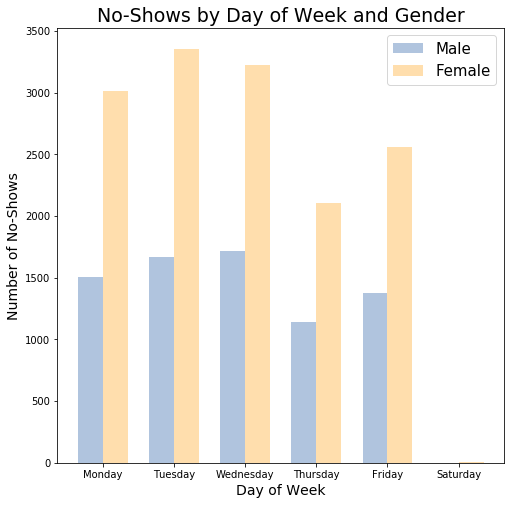

In [70]:
ind = np.arange(len(count_male))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(ind - width/2, count_male, width,
                color='lightsteelblue', label='Male')
rects2 = ax.bar(ind + width/2, count_female, width,
                color='navajowhite', label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Day of Week', size=14)
ax.set_ylabel('Number of No-Shows', size=14)
ax.set_title('No-Shows by Day of Week and Gender', size=19)
ax.set_xticks(ind)
ax.set_xticklabels(days)
ax.legend(fontsize = 15)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')
     

    plt.show()

#### Plotting  the percentages of No Show-ups by Gender  by Day of Week 

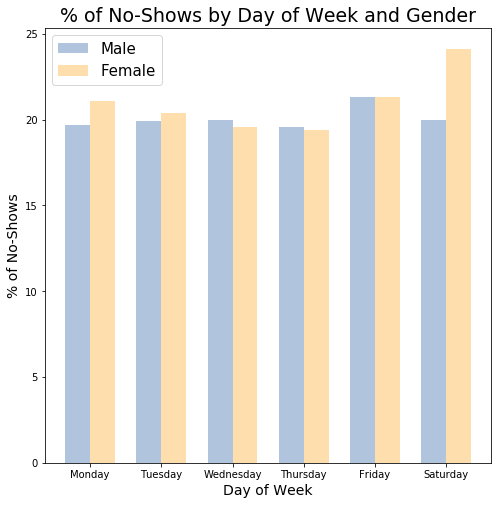

In [71]:
ind = np.arange(len(percent_female))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(ind - width/2, percent_male, width,
                color='lightsteelblue', label='Male')
rects2 = ax.bar(ind + width/2, percent_female, width,
                color='navajowhite', label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Day of Week', size=14)
ax.set_ylabel('% of No-Shows', size=14)
ax.set_title('% of No-Shows by Day of Week and Gender', size=19)
ax.set_xticks(ind)
ax.set_xticklabels(days)
ax.legend(fontsize = 15)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')
     

    plt.show()

### 2) Does the Number of  Awaiting Days,between Scheduled Date and Appointment Date, affect the probability of a patient to miss his/her appointment? Do patients with a greater Number of  Awaiting Days tend to miss their appointments more than those with fewer Awaiting Days?   What is the correlation between the Number of  Awaiting Days and the probability of a patient's Not-Showing up for the appointment?

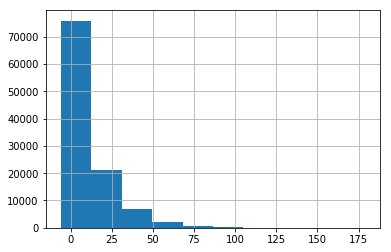

In [72]:
# checking the values' distribution of 'awaiting_days' column, to decide on the outliers range
df.awaiting_days.hist();

In [73]:
df.awaiting_days.value_counts().sort_index()

-6          1
-1          4
 0      37153
 1       5028
 2       6636
 3       2637
 4       5212
 5       3196
 6       3950
 7       4785
 8       2248
 9       1563
 10      1360
 11       955
 12      1083
 13      1622
 14      2813
 15      1440
 16      1111
 17      1077
 18      1002
 19      1012
 20      1151
 21      1789
 22      1137
 23       790
 24       608
 25       623
 26       712
 27       980
        ...  
 101        1
 102        4
 103        4
 104        8
 105        4
 107        2
 108        5
 109        5
 110        2
 111        3
 112        5
 115        2
 117        1
 119        4
 122        3
 123        1
 125        1
 126        1
 127        1
 132        1
 133       11
 139        1
 142        8
 146        1
 151        1
 155       10
 162       11
 169        8
 176       16
 179       10
Name: awaiting_days, Length: 131, dtype: int64

In [74]:
# getting a new dataframe without outliers in terms of Awaiting days
df_no_outliers =df.query('0 <= awaiting_days < 95 ')

# extracting specific selected columns to new DataFrame as a copy
df_awaiting_days = df_no_outliers[['awaiting_days','appointment_missed']].copy()

df_awaiting_days.shape

(106827, 2)

In [75]:
# counting the number of unique values in 'awaiting_days' variable 
df_awaiting_days['awaiting_days'].nunique()

95

In [76]:
df_awaiting_days1 = df_awaiting_days.groupby(['awaiting_days']).appointment_missed.sum().reset_index(name="count_noshows")

In [77]:
df_awaiting_days1.head()

,awaiting_days,count_noshows
0,0,1741
1,1,1075
2,2,1584
3,3,621
4,4,1209


- **Engineering 'awaiting_days' variable to facilitate the analysis of this column later** 

In [78]:
# defining the function that will be called to get ranges of awaiting days as a replacement of the 96 unique values of
# 'awaiting_days' variable
def days_detailed(x):
    if x in range(0,5):
        return ' 0-4'
    elif x in range(5,10):
        return ' 5-9'
    elif x in range(10,15):
        return '10-14'
    elif x in range(15,20):
        return '15-19'
    elif x in range(20,25):
        return '20-24'
    elif x in range(25,30):
        return '25-29'
    elif x in range(30,35):
        return '30-34'
    elif x in range(35,40):
        return '35-39'
    elif x in range(40,45):
        return '40-44'
    elif x in range(45,50):
        return '45-49'
    elif x in range(50,55):
        return '50-54'
    elif x in range(55,65):
        return '55-59'
    elif x in range(60,65):
        return '60-64'
    elif x in range(65,70):
        return '65-69'
    elif x in range(70,75):
        return '70-74'
    elif x in range(75,80):
        return '75-79'
    elif x in range(80,85):
        return '80-84'
    elif x in range(85,90):
        return '85-89'
    else:
        return '90-94'
    

# calling the above function, and assigning the ranges to a new variable 'awaiting_days_ranges'
df_awaiting_days['awaiting_days']= df_awaiting_days['awaiting_days'].apply(lambda x: days_detailed(x))
df_awaiting_days.rename(columns = {'awaiting_days':'awaiting_ranges'}, inplace = True)

In [79]:
# checking the resulting dataframe
df_awaiting_days.sample(5)

,awaiting_ranges,appointment_missed
10943,0-4,0
55233,0-4,1
50862,0-4,0
38072,5-9,0
85335,0-4,0


In [80]:
df_awaiting_days.shape

(106827, 2)

In [81]:
df_awaiting_ranges = df_awaiting_days.groupby(['awaiting_ranges']).appointment_missed.sum().reset_index(name="count_noshows")

In [82]:
df_awaiting_ranges

,awaiting_ranges,count_noshows
0,0-4,6230
1,5-9,4171
2,10-14,2475
3,15-19,1833
4,20-24,1835
5,25-29,1638
6,30-34,1067
7,35-39,738
8,40-44,493
9,45-49,226


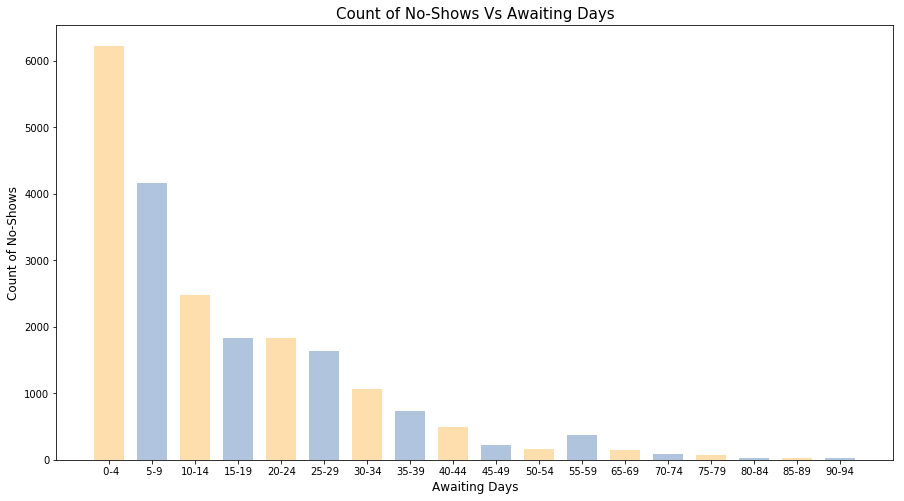

In [83]:
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(df_awaiting_ranges['awaiting_ranges'] , height=df_awaiting_ranges['count_noshows'], width=0.7, color=['navajowhite','lightsteelblue'])
plt.xlabel('Awaiting Days',fontsize=12)
plt.ylabel('Count of No-Shows',fontsize=12)
plt.title('Count of No-Shows Vs Awaiting Days',fontsize=15)  
plt.show()

In [84]:
# adding a new column to hold the "total numbers of appointments within the created awaiting ranges" 
df_awaiting_ranges_total= df_awaiting_days.groupby(['awaiting_ranges']).appointment_missed.count().reset_index(name="total_appointments")

In [85]:
# creating a list of the total numbers of appointments within each awaiting range
total_appointments = []
i = 0 

while i < df_awaiting_ranges_total.shape[0]:
    total_appointments.append(df_awaiting_ranges_total['total_appointments'][i])
    i += 1

In [86]:
# checking the resulted list of totals
total_appointments

[56666,
 15742,
 7833,
 5642,
 5475,
 4973,
 3248,
 2127,
 1379,
 676,
 521,
 1234,
 490,
 283,
 242,
 86,
 91,
 119]

In [87]:
# the total of 'total_appointments' values should be equal to the number of rows in df_awaiting_days data frame
sum(total_appointments) == df_awaiting_days.shape[0]

True

In [88]:
# adding the totals as new column to our new dataframe
df_awaiting_ranges['total_appointments'] = total_appointments
df_awaiting_ranges

,awaiting_ranges,count_noshows,total_appointments
0,0-4,6230,56666
1,5-9,4171,15742
2,10-14,2475,7833
3,15-19,1833,5642
4,20-24,1835,5475
5,25-29,1638,4973
6,30-34,1067,3248
7,35-39,738,2127
8,40-44,493,1379
9,45-49,226,676


In [89]:
#calculating the percentages of no shows for each awaiting range
percent_noshows = []
i = 0 

while i < df_awaiting_ranges.shape[0]:
    percentages = round((df_awaiting_ranges['count_noshows'][i]/df_awaiting_ranges['total_appointments'][i])*100, 2)
    percent_noshows.append(percentages)
    i += 1

In [90]:
# checking the resulted list of percentages
len(percent_noshows)

18

In [91]:
# adding the percentages as new column to our new dataframe
df_awaiting_ranges['percent_noshows'] = percent_noshows
df_awaiting_ranges

,awaiting_ranges,count_noshows,total_appointments,percent_noshows
0,0-4,6230,56666,10.99
1,5-9,4171,15742,26.50
2,10-14,2475,7833,31.60
3,15-19,1833,5642,32.49
4,20-24,1835,5475,33.52
5,25-29,1638,4973,32.94
6,30-34,1067,3248,32.85
7,35-39,738,2127,34.70
8,40-44,493,1379,35.75
9,45-49,226,676,33.43


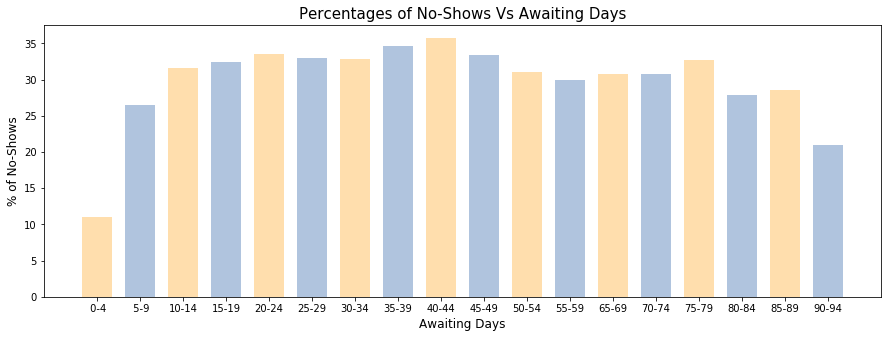

In [92]:
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(df_awaiting_ranges['awaiting_ranges'] , height=df_awaiting_ranges['percent_noshows'], width=0.7, color=['navajowhite','lightsteelblue'])
plt.xlabel('Awaiting Days',fontsize=12)
plt.ylabel('% of No-Shows',fontsize=12)
plt.title('Percentages of No-Shows Vs Awaiting Days',fontsize=15)  
plt.show()

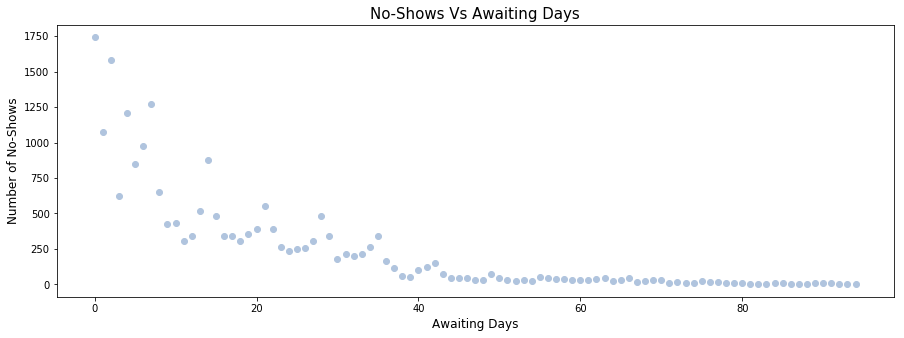

In [93]:
fig, ax = plt.subplots(figsize=(15,5))
awaiting_days = df_awaiting_days1['awaiting_days']
count = df_awaiting_days1['count_noshows']
plt.scatter(x= awaiting_days, y= count, color='lightsteelblue')
plt.xlabel('Awaiting Days',fontsize=12)
plt.ylabel('Number of No-Shows',fontsize=12)
plt.title('No-Shows Vs Awaiting Days',fontsize=15)
plt.show()

### 3) Do patients receiving SMS reminders have more probability to show up for their appointments than those who have not received the SMS reminders?

In [94]:
# extracting specific selected columns to new DataFrame as a copy to facilitate the analysis 
df_SMS = df[['SMS_received','appointment_missed']].copy()

df_SMS.shape

(106982, 2)

In [95]:
df_SMS= df_SMS.groupby('SMS_received')['appointment_missed'].sum().reset_index(name="count_noshows")
df_SMS

,SMS_received,count_noshows
0,0,12109
1,1,9568


In [96]:
# adding a new column to hold the "total numbers of appointments" 
df_SMS_total= df.groupby(['SMS_received']).appointment_missed.count().reset_index(name="total_appointments")

In [97]:
df_SMS_total['total_appointments'].sum()

106982

In [98]:
# creating a list of the total numbers of appointmens for patients who recieved SMS and those who did not 
total_appointments = []
i = 0 

while i < df_SMS_total.shape[0]:
    total_appointments.append(df_SMS_total['total_appointments'][i])
    i += 1
    
len(total_appointments)

2

In [99]:
# adding the totals as new column to our new dataframe
df_SMS['total_appointments'] = total_appointments
df_SMS

,SMS_received,count_noshows,total_appointments
0,0,12109,72398
1,1,9568,34584


In [100]:
# creating a list of the total numbers of appointmens attended for patients who recieved SMS and those who did not 
count_show_ups= []
i = 0 

while i < df_SMS.shape[0]:
    show_ups = df_SMS['total_appointments'][i]- df_SMS['count_noshows'][i]
    count_show_ups.append(show_ups)
    i += 1
    
count_show_ups

[60289, 25016]

In [101]:
# renaming the 'count_noshows' column in the 'df_SMS' datframe
df_SMS.rename(columns={'count_noshows':'attended_appointments'},inplace = True)

# adding the totals as new column to our new dataframe
df_SMS['attended_appointments'] = count_show_ups
df_SMS

,SMS_received,attended_appointments,total_appointments
0,0,60289,72398
1,1,25016,34584


In [102]:
#calculating the percentages of attended_appointments for patients who recieved SMS and those who did not
percent_shows = []
percent_noshows = []
i = 0 

while i < df_SMS.shape[0]:
    perc_shows = round((df_SMS['attended_appointments'][i]/df_SMS['total_appointments'][i])*100, 2)
    count_noshows = df_SMS['total_appointments'][i]- df_SMS['attended_appointments'][i]
    perc_noshows = round((count_noshows/df_SMS['total_appointments'][i])*100, 2)
    percent_shows.append(perc_shows)
    percent_noshows.append(perc_noshows)
    i += 1

In [103]:
print(percent_shows)
print(percent_noshows)

[83.27, 72.33]
[16.73, 27.67]


In [104]:
# adding the percentages of both shows and no-shows as new columns to our dataframe
df_SMS['percent_shows'] = percent_shows
df_SMS['percent_noshows'] = percent_noshows
df_SMS

,SMS_received,attended_appointments,total_appointments,percent_shows,percent_noshows
0,0,60289,72398,83.27,16.73
1,1,25016,34584,72.33,27.67


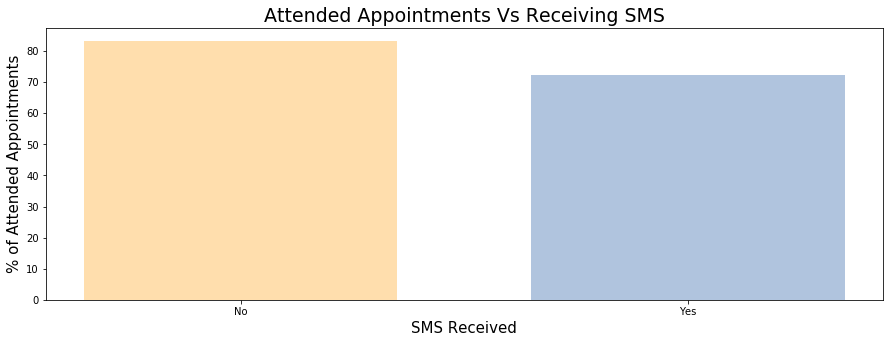

In [105]:
font = {'size': 9 }
fig, ax = plt.subplots(figsize=(15,5))
status = ['No','Yes']
plt.bar(status , height=df_SMS['percent_shows'], width=0.7, color=['navajowhite','lightsteelblue'])
plt.xlabel('SMS Received',fontsize=15)
plt.ylabel('% of Attended Appointments',fontsize=15)
plt.title('Attended Appointments Vs Receiving SMS',fontsize=19)
plt.rc('font', **font)
plt.show()

<a id='step6'></a>
## Step 6: Deployment

In [106]:
## Not applicable for the type of analysis done on this project

<a id='resources'></a>
## Resources

- https://www.kaggle.com/joniarroba/noshowappointments **(DataSet Resource)**
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.isoweekday.html
- https://www.freecodecamp.org/forum/t/python-pandas-how-do-i-get-the-length-of-arrays-that-are-values-of-a-column/22772
- https://pyformat.info/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
- https://datascience.stackexchange.com/questions/27900/nominal-categorical-variable-with-two-levels-label-encoding-or-one-hot-encoding
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- https://www.geeksforgeeks.org/python-ways-to-create-a-dictionary-of-lists/
- https://treyhunner.com/2016/04/how-to-loop-with-indexes-in-python/
- https://stackoverflow.com/questions/43560801/display-y-axis-value-horizontal-line-drawn-in-bar-chart?rq=1
- https://github.com/paulstancliffe/Blog-Post-AirBnB-Seattle/blob/master/seattle_airbnb-v2.ipynb
- https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
- https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts
- https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
- https://stackoverflow.com/questions/21254472/multiple-plot-in-one-figure-in-python